In [ ]:
# Ustawienia obliczeń

SETTINGS = {
        'img_name': "./img/Shepp_logan.jpg",
        'shape': (240, 240),
        'n_det': 100,
        'range_angle': pi *1.3,
        'n_steps': 200
    }

100%|██████████| 200/200 [00:18<00:00, 10.72it/s]


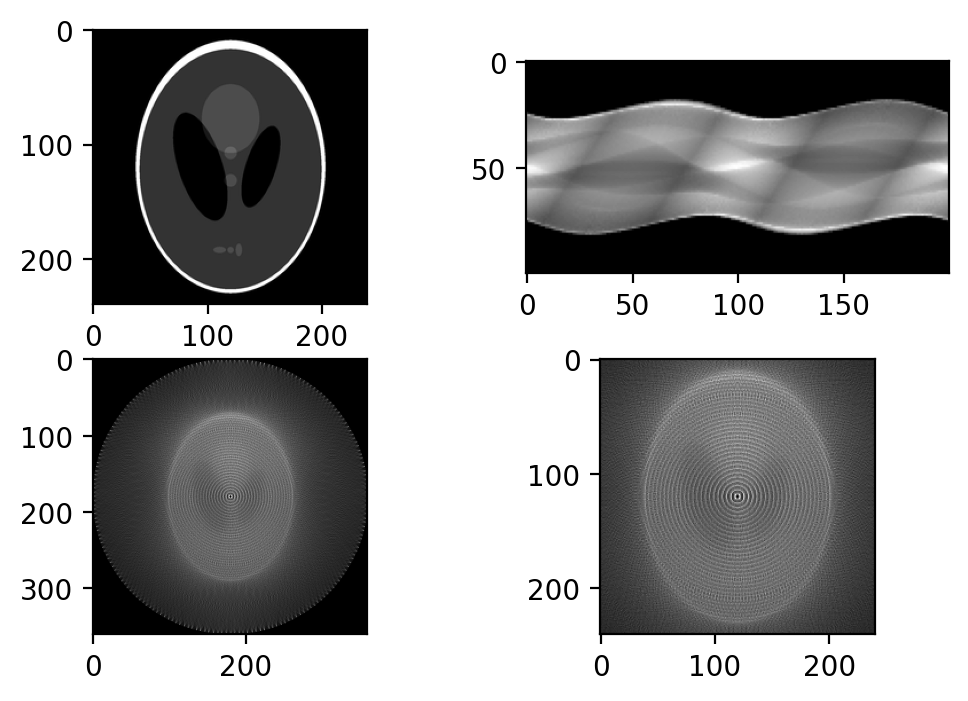

In [5]:
# komórka obliczająca obie transformaty i pokazująca wyniki

from main_ver2 import compute
from parse_img import parse_img
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
alpha = 0

img_original, img = parse_img(SETTINGS['img_name'], SETTINGS['shape'])
radon, inv_radon, inv_radons, det_emits = compute(SETTINGS, img)
plt.subplot(2, 2, 1)
plt.imshow(img_original, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(radon, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(inv_radon, cmap='gray')
plt.subplot(2, 2, 4)
part0 = int((1 / 6) * inv_radon.shape[0])
part1 = int((1 / 6) * inv_radon.shape[1])
inv_radon = inv_radon[part0:-part0, part1:-part1]
inv_radon -= np.min(inv_radon)
plt.imshow(inv_radon, cmap='gray')
plt.show()

In [8]:
#Komórka umożliwiająca zobaczenie obliczania transformaty krok po kroku

%matplotlib inline
plt.rcParams['figure.dpi'] = 200
from IPython.display import display
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

# x = np.linspace(0, 2 * np.pi)
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# line, = ax.plot(x, np.sin(x))
button = widgets.Button(description="Click Me!")
# plt.rcParams['figure.figsize'] = [15, 7]


def on_button_clicked(b):
    with output:
        print("Button clicked.")
        
def update(step = (1, SETTINGS['n_steps']-1, 1), show_detectors = False):
    global radon, inv_radons, det_emits, img
#     plt.tight_layout()
    plt.subplot(1, 3, 1)
    plt.imshow(radon[:, :step], cmap='gray')
    plt.subplot(1, 3, 2)
    plt.imshow(inv_radons[step], cmap='gray')
    plt.xticks([]), plt.yticks([])
    if(show_detectors):
        plt.subplot(1,3,3)
        plt.imshow(img, cmap='gray')
        emiter, detectors = det_emits[step]
        plt.xticks([]), plt.yticks([])
        plt.scatter(*emiter, c='g')
        plt.xlim(0, img.shape[0])
        plt.ylim(img.shape[1], 0)
        plt.plot(*zip(*detectors), 'r.')

#     line.set_ydata(np.sin(w * x))
#     fig.canvas.draw_idle()
# button.on_click(on_button_clicked)
interact(update);

# output = widgets.Output()

# display(button, output)



interactive(children=(IntSlider(value=100, description='step', max=199, min=1), Checkbox(value=False, descript…

In [11]:
# Komórka obsługująca DICOM

from dicom_parsing import dicom_save, dicom_load
from sklearn.preprocessing import normalize
import numpy as np
%matplotlib inline
def dicom_work(patient="", comments="", date=""):
    global inv_radon, img
    
    norm1 = inv_radon * 10000 / np.linalg.norm(inv_radon)
    norm1 = norm1.astype('uint8')
    
    #zapisywanie do pliku
    dicom_save(norm1, "./test.dcm", patient, comments, date)
    
    # wczytywanie z pliku
    img = dicom_load("./test.dcm")

    plt.figure()
    plt.imshow(img)

interact_manual(dicom_work, patient="Marek Subocz", comments="Tu komentarz do obrazka", date="20200402")

interactive(children=(Text(value='Marek Subocz', description='patient'), Text(value='Tu komentarz do obrazka',…

<function __main__.dicom_work(patient='', comments='', date='')>